# 1. Exemple de classification KNN sur le jeu de données IRIS

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

KeyboardInterrupt: 

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

caractéristiques X, cible à prédire y

In [ ]:
X=iris.data
y=iris.target



In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

normalisation des données

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X) 
# ou standardize the data attributes
#standardized_X = preprocessing.scale(X)

jeu d'entrainement/jeu de test . Par défaut test_size=0.25

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(normalized_X,y, test_size=0.2)

In [ ]:
Xtrain.shape

(120, 4)

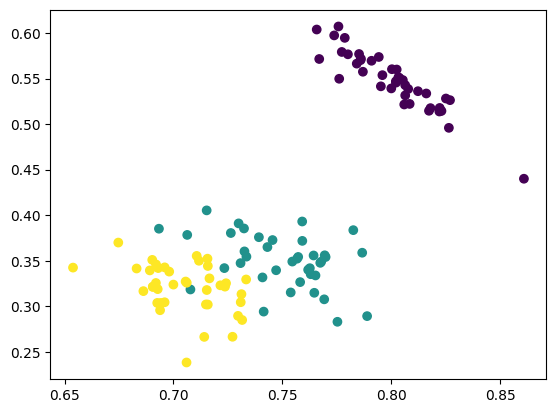

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xtrain[:,0] , Xtrain[:,1] , c=ytrain)
plt.show()


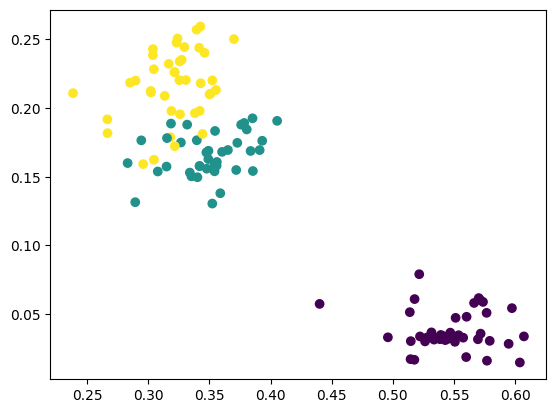

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xtrain[:,1] , Xtrain[:,3] , c=ytrain)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(11)

In [ ]:
kmodel.fit(Xtrain,ytrain)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
ytrainPred = kmodel.predict(Xtrain)
ytestPred = kmodel.predict(Xtest)

In [ ]:
print('Training Accuracy',(ytrain == ytrainPred).sum()/len(Xtrain))
print('Testing Accuracy',(ytest == ytestPred).sum()/len(Xtest))

Training Accuracy 0.975
Testing Accuracy 0.9666666666666667


In [ ]:
#Autre possibilité
print('Training Accuracy',kmodel.score(Xtrain,ytrain))
print('Testing Accuracy',kmodel.score(Xtest,ytest))

Training Accuracy 0.975
Testing Accuracy 0.9666666666666667


In [ ]:
# validation croisée en utilisant scikit Learn
from sklearn.model_selection import cross_val_score
cross_val_score(kmodel,Xtrain,ytrain,cv=5,scoring="accuracy")

array([0.95833333, 1.        , 0.91666667, 1.        , 0.95833333])

In [ ]:
#Prédiction pour les valeurs : 0.2,0.3,0.7,0.8
print(kmodel.predict([[5.9, 3. , 5.1, 1.8]]))

[2]


In [ ]:
print(iris['target_names'][kmodel.predict([[0.2,0.3,0.7,0.8]])])

['virginica']


In [ ]:
#tuning the k value
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

training_scores = []
testing_scores = []
for i in range(1,13):
  
  kmodel = KNeighborsClassifier(i)
  kmodel.fit(Xtrain,ytrain)

  print(i,kmodel.score(Xtrain,ytrain))
  training_scores.append(kmodel.score(Xtrain,ytrain))

  print(i,kmodel.score(Xtest,ytest))
  testing_scores.append(kmodel.score(Xtest,ytest))
  print('*************')

1 1.0
1 0.9210526315789473
*************
2 0.9821428571428571
2 0.8947368421052632
*************
3 0.9732142857142857
3 0.9473684210526315
*************
4 0.9821428571428571
4 0.9210526315789473
*************
5 0.9910714285714286
5 0.9210526315789473
*************
6 0.9910714285714286
6 0.9473684210526315
*************
7 0.9910714285714286
7 0.9473684210526315
*************
8 0.9732142857142857
8 0.9210526315789473
*************
9 0.9910714285714286
9 0.9210526315789473
*************
10 0.9910714285714286
10 0.9210526315789473
*************
11 0.9910714285714286
11 0.9736842105263158
*************
12 0.9821428571428571
12 0.9210526315789473
*************


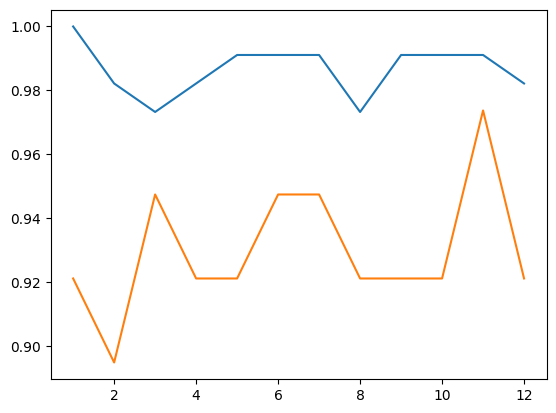

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,13),training_scores)
plt.plot(range(1,13),testing_scores)

plt.show()

# 2. Jeu de données MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/home4/ep298479/venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

X, y

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape


(70000,)

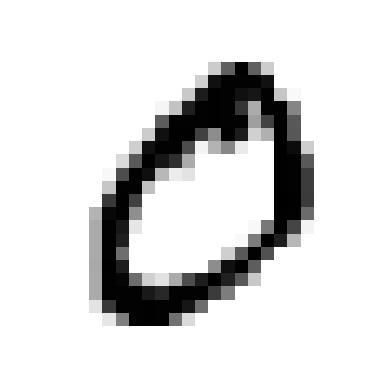

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
y[1]

'0'

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

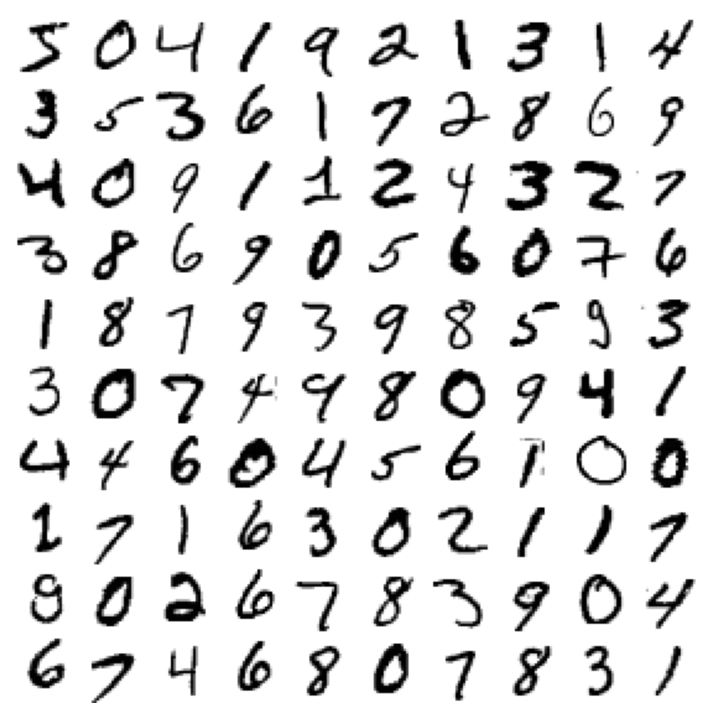

In [ ]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

données d'entrainement/données test

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


## 2.1 Classification binaire : on reconnait les 0 uniquement

In [ ]:
y_train_0=(y_train==0) # vrai pour les 0, faux pour le reste
y_test_0=(y_test==0)

Classification binaire : classificateur de descente de gradient stochastique

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

validation croisée

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")


array([0.9854, 0.9847, 0.9865])

comparaison par rapport à un classifieur qui classerait tout comme non 0

In [ ]:
from sklearn.base import BaseEstimator
class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")


array([0.9003 , 0.9035 , 0.90005])

matrice de confusion (TN, FP; FN, TP)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_0, y_train_pred)

précision et rappel

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred)

0.9052429052429053

In [ ]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9052429052429053

In [ ]:
recall_score(y_train_0, y_train_pred)

0.9532331588721932

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.9532331588721932

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_0, y_train_pred)

0.9286184210526315

Compromis précision/rappel

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

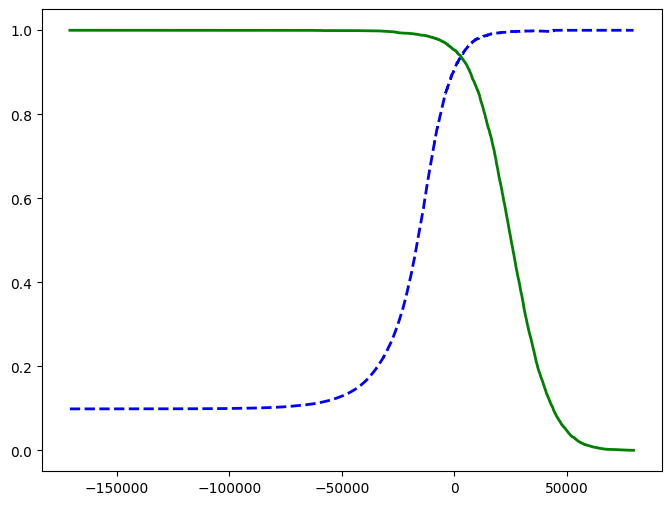

In [ ]:
plt.figure(figsize=(8, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


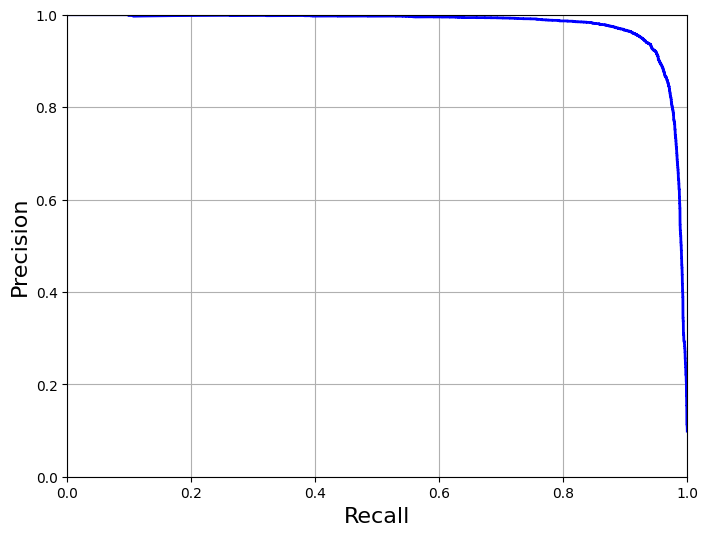

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

Courbe ROC

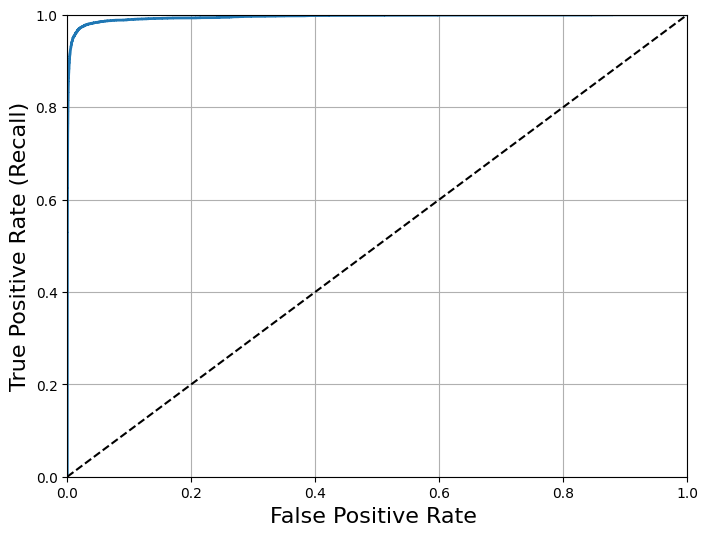

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate ', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)

## 2.2 Classification multi-étiquettes avec KNN (A compléter)